In [1]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:01<00:00, 156MB/s]
100% 163M/163M [00:01<00:00, 142MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**IMporting the libraries**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2805.jpg', 'with_mask_2997.jpg', 'with_mask_239.jpg', 'with_mask_3618.jpg', 'with_mask_827.jpg']
['with_mask_3337.jpg', 'with_mask_1730.jpg', 'with_mask_176.jpg', 'with_mask_1892.jpg', 'with_mask_1716.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2103.jpg', 'without_mask_511.jpg', 'without_mask_2793.jpg', 'without_mask_3744.jpg', 'without_mask_2271.jpg']
['without_mask_3700.jpg', 'without_mask_1464.jpg', 'without_mask_34.jpg', 'without_mask_3666.jpg', 'without_mask_1730.jpg']


In [11]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of images**

with mask --1
without mask --0

In [12]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Display the images**

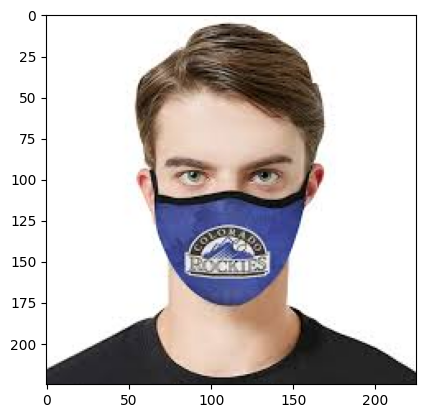

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_2997.jpg')
imgplot = plt.imshow(img)
plt.show()

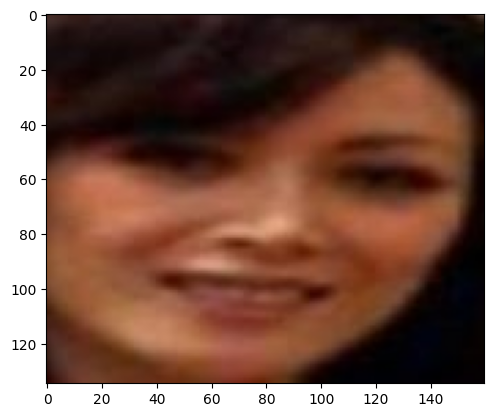

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_511.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the images

convert the images into array

In [21]:
with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[249, 248, 250],
        [248, 245, 245],
        [255, 252, 247],
        ...,
        [234, 224, 221],
        [244, 245, 245],
        [243, 243, 243]],

       [[246, 248, 251],
        [247, 246, 247],
        [253, 250, 247],
        ...,
        [199, 191, 188],
        [242, 242, 242],
        [242, 242, 242]],

       [[246, 250, 254],
        [247, 249, 251],
        [251, 248, 248],
        ...,
        [216, 213, 210],
        [241, 241, 241],
        [247, 247, 247]]], dtype=uint8)
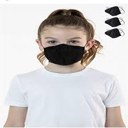

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

converting image list to label list to numpy array

In [28]:
X = np.array(data)
Y = np.array(labels)

In [29]:
type(X)
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(Y)

[1 1 1 ... 0 0 0]


Train test

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[232, 232, 234],
        [232, 232, 234],
        [232, 232, 234],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [232, 232, 234]],

       [[232, 232, 234],
        [232, 232, 234],
        [232, 232, 234],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [232, 232, 234]],

       [[232, 232, 234],
        [232, 232, 234],
        [232, 232, 234],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [232, 232, 234]],

       ...,

       [[210, 219, 211],
        [214, 216, 213],
        [218, 213, 216],
        ...,
        [229, 229, 237],
        [230, 228, 233],
        [234, 232, 235]],

       [[210, 219, 211],
        [214, 216, 213],
        [218, 213, 216],
        ...,
        [229, 228, 236],
        [229, 227, 232],
        [234, 233, 235]],

       [[211, 218, 211],
        [215, 215, 213],
        [218, 213, 216],
        ...,
        [229, 229, 235],
        [230, 230, 232],
        [232, 232, 234]]], dtype=uint8)
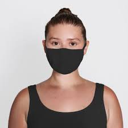

In [38]:
X_train[0]

In [39]:
X_train_scaled[0]

array([[[0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        ...,
        [0.91372549, 0.91372549, 0.92156863],
        [0.91372549, 0.91372549, 0.92156863],
        [0.90980392, 0.90980392, 0.91764706]],

       [[0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        ...,
        [0.91372549, 0.91372549, 0.92156863],
        [0.91372549, 0.91372549, 0.92156863],
        [0.90980392, 0.90980392, 0.91764706]],

       [[0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        [0.90980392, 0.90980392, 0.91764706],
        ...,
        [0.91372549, 0.91372549, 0.92156863],
        [0.91372549, 0.91372549, 0.92156863],
        [0.90980392, 0.90980392, 0.91764706]],

       ...,

       [[0.82352941, 0.85882353, 0.82745098],
        [0.83921569, 0.84705882, 0.83529412],
        [0.85490196, 0

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 152s 896ms/step - acc: 0.9720 - loss: 0.0750 - val_acc: 0.9372 - val_loss: 0.2596
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 855ms/step - acc: 0.9664 - loss: 0.0797 - val_acc: 0.9372 - val_loss: 0.2929
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 147s 863ms/step - acc: 0.9732 - loss: 0.0710 - val_acc: 0.9091 - val_loss: 0.3164
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 850ms/step - acc: 0.9784 - loss: 0.0613 - val_acc: 0.9488 - val_loss: 0.3496
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 858ms/step - acc: 0.9755 - loss: 0.0678 - val_acc: 0.9339 - val_loss: 0.3019


In [48]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - acc: 0.9331 - loss: 0.2370
Test Accuracy = 0.9351422786712646


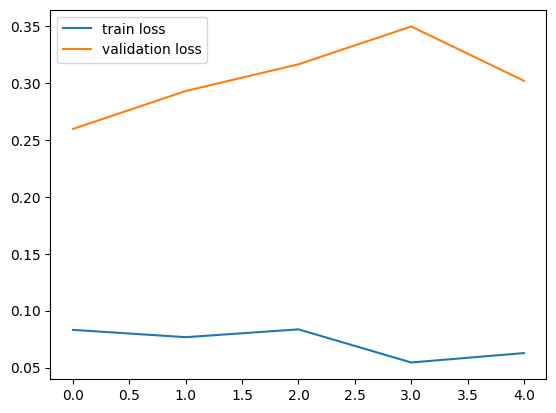

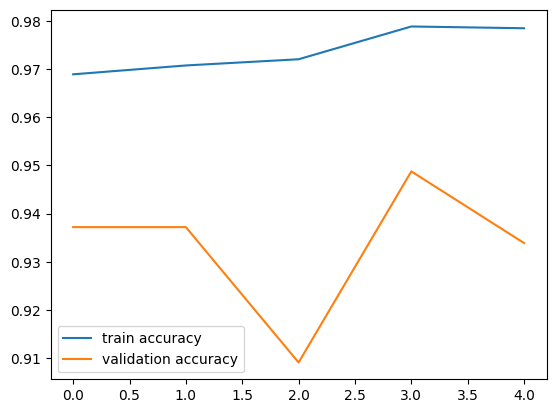

In [49]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted/content/data/without_mask/without_mask_1004.jpg


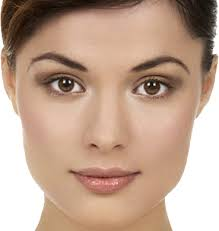

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.38393915 0.6878209 ]]
1
The person in the image is wearing mask


In [54]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)  #0 or 1

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')